In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from fastai.vision import *

In [2]:
path = Path('/notebooks'); print(path)
data_path = path
labels = pd.read_csv('/notebooks/train_labels.csv')
work_path = path/'models'

/notebooks


In [3]:
labels.rename(columns={'id': 'name'})
labels['id']='train/'+labels['id']+'.tif'

In [4]:
data = ImageDataBunch.from_df(data_path,
                              labels,
                              #test='test',
                              ds_tfms=get_transforms(do_flip=True,
                                                    flip_vert=True,
                                                    max_lighting=0.1,
                                                    max_warp=0.),
                              size=64,
                              bs=256).normalize(imagenet_stats)

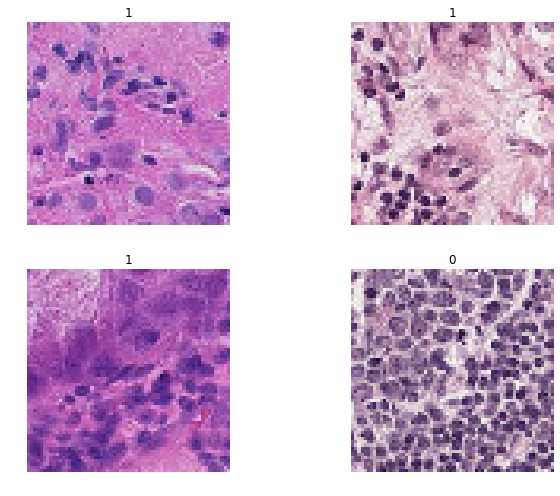

In [5]:
data.show_batch(2, figsize=(10,7))

In [9]:
arch_res = models.resnet50
arch_dens = models.densenet169

def getResLearner():
    return cnn_learner(data,
                       arch_res,
                       metrics=[accuracy, AUROC()],
                       model_dir=work_path)

def getDensLearner():
    return cnn_learner(data,
                       arch_dens,
                       metrics=[accuracy, AUROC()],
                       model_dir=work_path)

In [10]:
lr_rates = []
losses = []
model = []

iterations = 600

Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /root/.cache/torch/checkpoints/densenet169-b2777c0a.pth


epoch,train_loss,valid_loss,accuracy,auroc,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


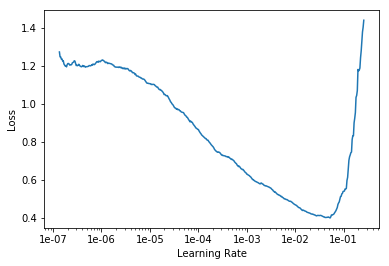

In [11]:
learn = getDensLearner()

learn.lr_find(num_it=iterations)

model.append("Densnet169")
lr_rates.append(learn.recorder.lrs)
losses.append(learn.recorder.losses)

learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,auroc,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


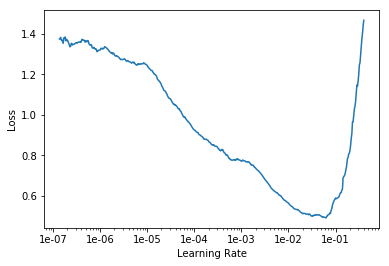

In [12]:
learn = getResLearner()

learn.lr_find(num_it=iterations)

model.append("Resnet50")
lr_rates.append(learn.recorder.lrs)
losses.append(learn.recorder.losses)

learn.recorder.plot()

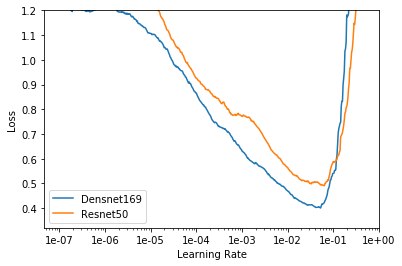

In [13]:
_, ax = plt.subplots(1,1)
min_y = 0.5
max_y = 1.2

for i in range(len(losses)):
    ax.plot(lr_rates[i], losses[i])
    min_y = min(np.asarray(losses[i]).min(), min_y)
    
ax.set_ylabel("Loss")
ax.set_xlabel("Learning Rate")
ax.set_xscale('log')

#ax.set_xlim((1e-4, 1e0))
ax.set_ylim((min_y - 0.2*min_y, max_y))

ax.legend(model)
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.0e'))